In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bar_chart_race as bar
from functools import reduce
from matplotlib.pyplot import figure

In [2]:
deliveries=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\deliveries.csv')

matches=pd.read_csv('C:\\Users\\NOMESH\\Downloads\\Project\matches.csv')

In [3]:
data=[deliveries,matches]

In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# cleaning data

In [7]:
matches.drop('umpire3',axis=1,inplace=True)

In [8]:
matches['umpire2']=matches['umpire2'].fillna(matches['umpire2'].mode().iloc[0])
matches['umpire1']=matches['umpire1'].fillna(matches['umpire1'].mode().iloc[0])

In [9]:
matches.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [10]:
matches[matches['result']=='tie']

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
33,34,IPL-2017,Rajkot,29-04-2017,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney
125,126,IPL-2009,Cape Town,23-04-2009,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus
189,190,IPL-2010,Chennai,21-03-2010,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper
387,388,IPL-2013,Hyderabad,07-04-2013,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi
400,401,IPL-2013,Bangalore,16-04-2013,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni
475,476,IPL-2014,Abu Dhabi,29-04-2014,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary
535,536,IPL-2015,Ahmedabad,21-04-2015,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi
705,11146,IPL-2019,Delhi,30-03-2019,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon
746,11342,IPL-2019,Mumbai,02-05-2019,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan


In [11]:
matches.shape

(756, 17)

In [12]:
matches.dropna(axis=0,inplace=True)

In [13]:
matches.shape

(745, 17)

In [14]:
matches['toss_winner'].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    79
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [15]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
#replacing duplicates with one common value
matches['team1'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['team2'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)
matches['toss_winner'].replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

In [19]:
#dropping null values
matches['winner'].dropna(inplace=True)

In [20]:
matches['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [21]:
matches['venue'].nunique()

40

In [22]:
#Cleaning venue column
(matches['venue'].replace({'ACA-VDCA Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                            'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi Intl. Cricket Stadium',
                            'IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali',
                            'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                            'Feroz Shah Kotla':'Feroz Shah Kotla Ground',
                            'M. A. Chidambaram Stadium':'MA Chidambaram Stadium, Chepauk'},inplace=True))

In [23]:
matches['venue'].nunique()

34

In [24]:
team1=matches[matches['team1']!=matches['toss_winner']]['team1']

In [25]:
team2=matches[matches['team2']!=matches['toss_winner']]['team2']

In [26]:
toss_losser_teams=pd.concat([team1,team2])

In [27]:
matches['toss_winner']

0      Royal Challengers Bangalore
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752            Chennai Super Kings
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: toss_winner, Length: 745, dtype: object

In [28]:
toss_losser_teams

0              Sunrisers Hyderabad
1                   Mumbai Indians
2                    Gujarat Lions
3           Rising Pune Supergiant
5                    Gujarat Lions
                  ...             
741    Royal Challengers Bangalore
746            Sunrisers Hyderabad
748                 Delhi Capitals
752                 Mumbai Indians
755            Chennai Super Kings
Length: 745, dtype: object

In [29]:
toss_result=pd.concat([matches['toss_winner'],toss_losser_teams],axis=1)

In [30]:
toss_result.head()

,toss_winner,0
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Mumbai Indians
2,Kolkata Knight Riders,Gujarat Lions
3,Kings XI Punjab,Rising Pune Supergiant
4,Royal Challengers Bangalore,Delhi Daredevils


In [31]:
toss_result.rename(columns={0:'toss_losser'},inplace=True)

In [32]:
toss_result_count=pd.DataFrame(toss_result['toss_winner'].value_counts())

In [33]:
toss_result_count['toss_losser']=toss_result['toss_losser'].value_counts()

In [34]:
toss_result_count

,toss_winner,toss_losser
Mumbai Indians,96,88
Kolkata Knight Riders,91,86
Chennai Super Kings,89,73
Kings XI Punjab,80,95
Delhi Daredevils,79,78
Royal Challengers Bangalore,79,96
Rajasthan Royals,77,67
Sunrisers Hyderabad,45,61
Deccan Chargers,43,32
Pune Warriors,20,25


# Analysis

Text(0.5, 0, 'Teams')

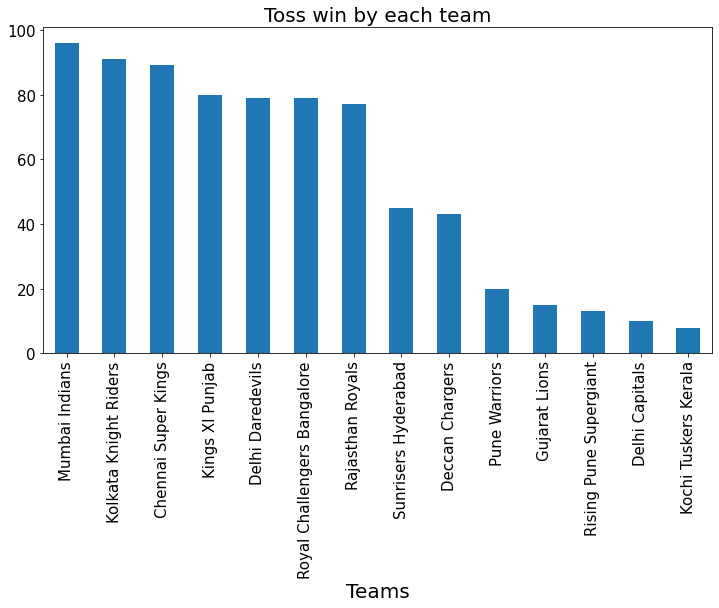

In [35]:
toss_result_count['toss_winner'].plot.bar(figsize=(12,6),fontsize=15)
plt.title('Toss win by each team',fontsize=20)
plt.xlabel('Teams',fontsize=20)

Text(0.5, 0, 'Teams')

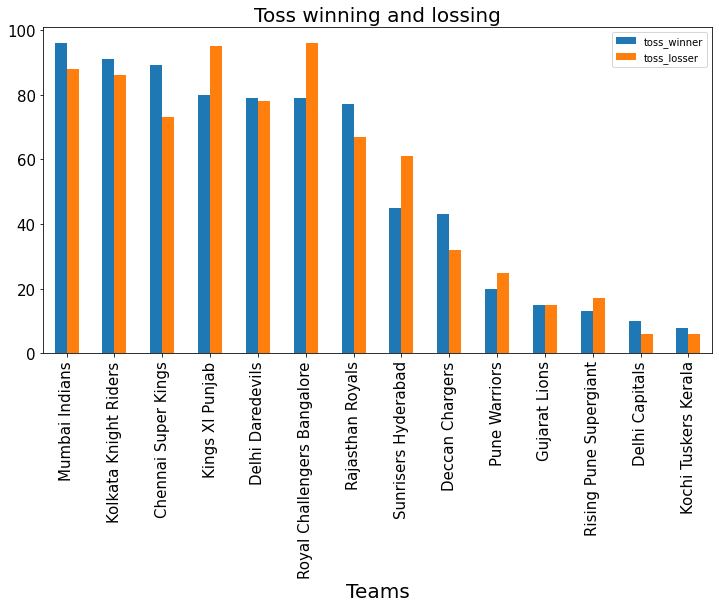

In [36]:
toss_result_count.plot.bar(figsize=(12,6),fontsize=15)
plt.title("Toss winning and lossing",fontsize=20)
plt.xlabel('Teams',fontsize=20)

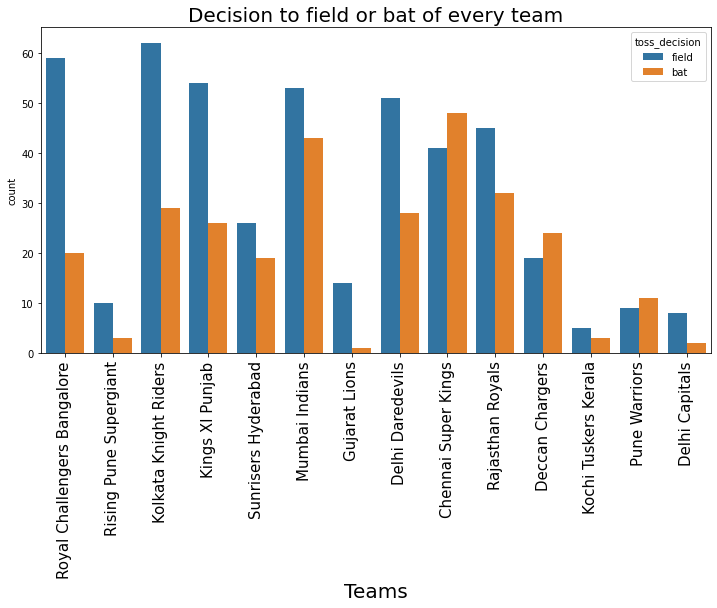

In [37]:
plt.subplots(figsize=(12,6))
sns.countplot(x='toss_winner',hue='toss_decision',data=matches )
plt.title("Decision to field or bat of every team",fontsize=20)
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Teams',fontsize=20)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

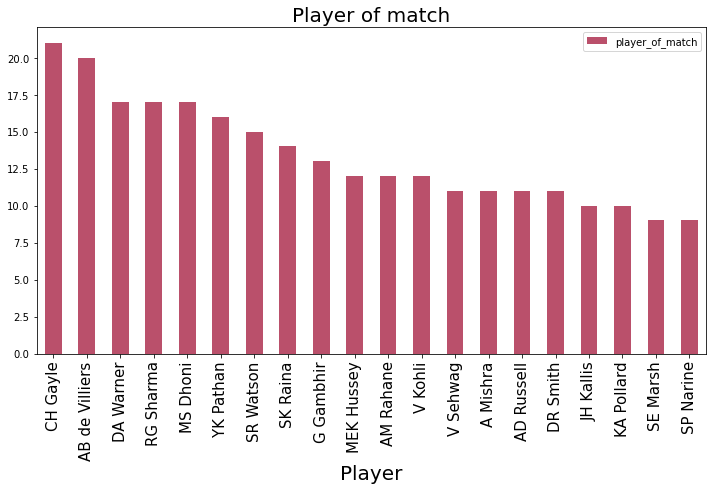

In [38]:
pd.DataFrame(matches['player_of_match'].value_counts().nlargest(20)).plot.bar(color='#ba506b',figsize=(12,6))
plt.title("Player of match",fontsize=20)
plt.xlabel('Player',fontsize=20)
plt.xticks(fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

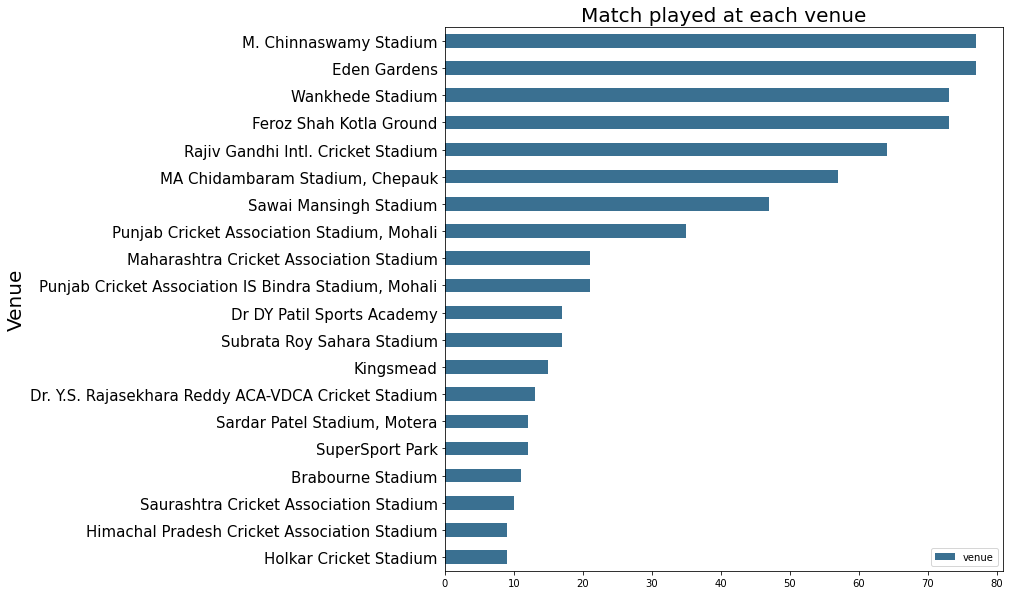

In [39]:
pd.DataFrame(matches['venue'].value_counts().nlargest(20).sort_values(ascending=True)).plot.barh(color='#3a7091',figsize=(10,10))
plt.title("Match played at each venue",fontsize=20)
plt.ylabel('Venue',fontsize=20)
plt.yticks(fontsize=15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

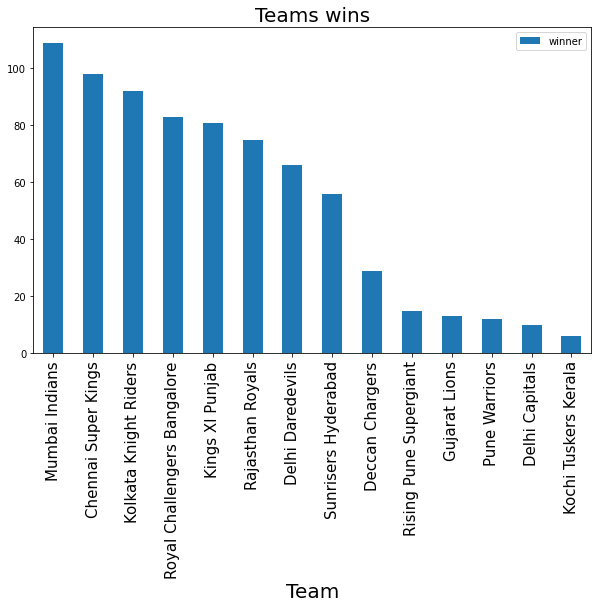

In [40]:
pd.DataFrame(matches['winner'].value_counts()).plot.bar(figsize=(10,6))
plt.title("Teams wins",fontsize=20)
plt.xlabel('Team',fontsize=20)
plt.xticks(fontsize=15)

In [41]:
match_played_by_each_team=pd.DataFrame(matches['team1'].value_counts()+(matches['team2'].value_counts()))
match_played_by_each_team['match_played']=match_played_by_each_team[0]
match_played_by_each_team.drop(0,axis=1,inplace=True)

In [42]:
match_played_by_each_team['match_won']=matches['winner'].value_counts()

In [43]:
match_played_by_each_team['match_loss']=match_played_by_each_team['match_played']-match_played_by_each_team['match_won']

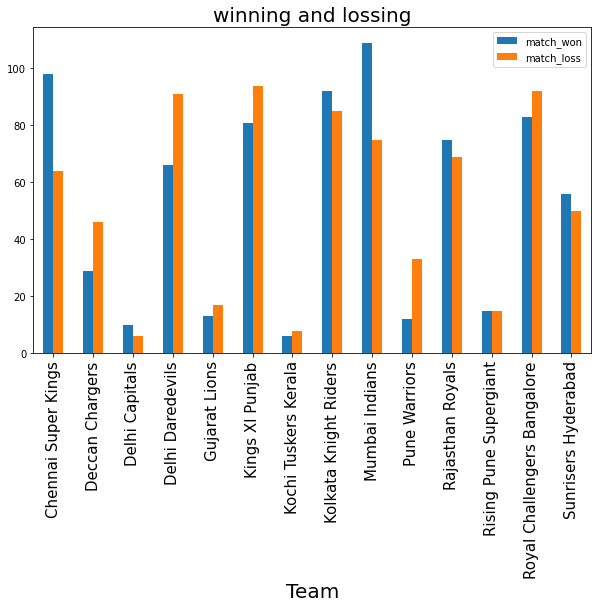

In [44]:
match_played_by_each_team[['match_won','match_loss']].plot.bar(figsize=(10,6))
plt.title("winning and lossing",fontsize=20)
plt.xlabel('Team',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

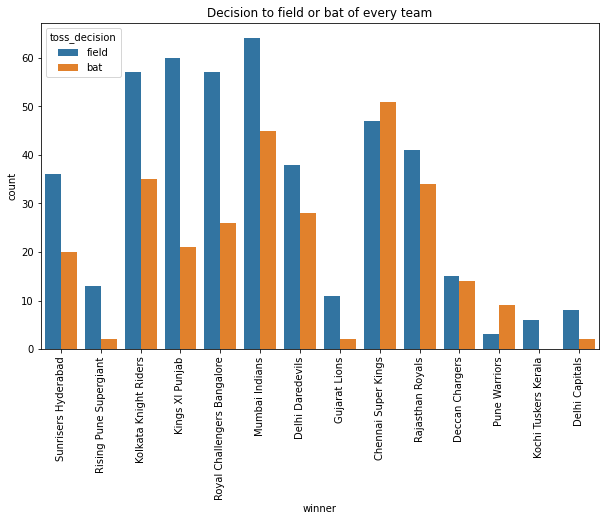

In [45]:
plt.subplots(figsize=(10,6))
sns.countplot(x='winner',hue='toss_decision',data=matches )
plt.title("Decision to field or bat of every team")
plt.xticks(rotation='vertical')
plt.show()

(array([-50., -25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 11 Text major ticklabel objects>)

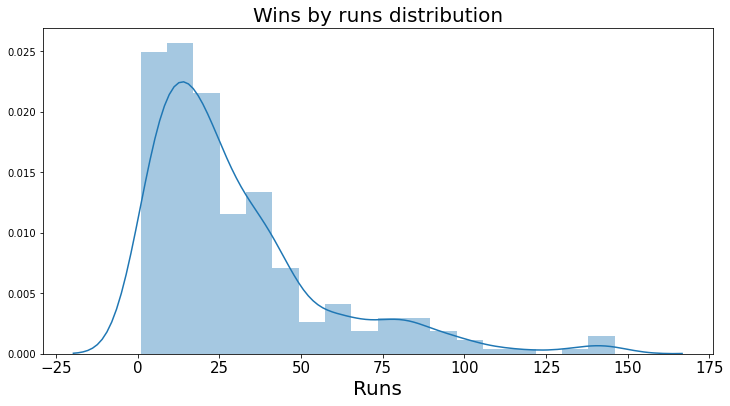

In [57]:
plt.figure(figsize=(12,6))
sns.distplot(matches[matches['win_by_runs']!=0]['win_by_runs'])
plt.title("Wins by runs distribution",fontsize=20)
plt.xlabel('Runs',fontsize=20)
plt.xticks(fontsize=15)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 9 Text major ticklabel objects>)

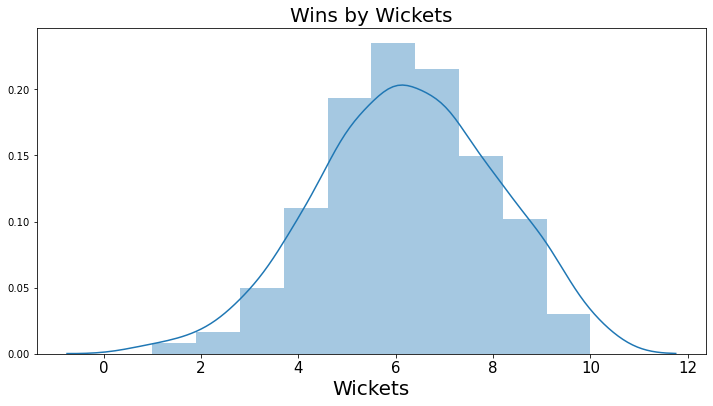

In [63]:
plt.figure(figsize=(12,6))
sns.distplot(matches[matches['win_by_wickets']!=0]['win_by_wickets'],bins=10)
plt.title("Wins by Wickets",fontsize=20)
plt.xlabel('Wickets',fontsize=20)
plt.xticks(fontsize=15)

In [48]:
#function for finding match summary
def match_stats(data,match_id):
    #filtering inning1 and inning2 of given match_id
    inning1=data[(data['match_id']==match_id) & (data['inning']==1)][['total_runs','player_dismissed']]
    inning2=data[(data['match_id']==match_id) & (data['inning']==2)][['total_runs','player_dismissed']]
    
    #extractin names of teams
    team1=data[(data['match_id']==match_id) & (data['inning']==1)]['batting_team'].iloc[-1]
    team2=data[(data['match_id']==match_id) & (data['inning']==2)]['batting_team'].iloc[-1]
    
    #setting index according to balls
    inning1.reset_index(inplace=True)
    inning1.drop('index',axis=1,inplace=True)
    inning2.reset_index(inplace=True)
    inning2.drop('index',axis=1,inplace=True)
    
    #setting values of next row score= current row score + next row score for making values compatible with line plot
    rows1 = inning1.shape[0]
    for row in range(1,rows1):
        inning1['total_runs'].iloc[row] = inning1['total_runs'].iloc[row] + inning1['total_runs'].iloc[row-1]
    rows2 = inning2.shape[0]
    for row in range(1,rows2):
        inning2['total_runs'].iloc[row] = inning2['total_runs'].iloc[row] + inning2['total_runs'].iloc[row-1]
        
    #giving columns good names
    inning1.rename(columns={'total_runs':team1,'player_dismissed':'player_dismissed_team1'},inplace=True)
    inning2.rename(columns={'total_runs':team2,'player_dismissed':'player_dismissed_team2'},inplace=True)
    
    #combining both inning dataset
    result=inning1.combine_first(inning2)
    
    #extracting score at which player got bowled to make data for scatter plot
    result['player_dismissed_team1'].loc[result['player_dismissed_team1'].notnull()]=result[team1]
    result['player_dismissed_team2'].loc[result['player_dismissed_team2'].notnull()]=result[team2]
    result.reset_index(inplace=True)
    result.rename(columns={'index':'ball'},inplace=True)
    
    
    #plotting
    figure(figsize=(10,6))
    plt.scatter(result['ball'], result['player_dismissed_team1'], label='player_dismissed_of_team1',s=200)
    plt.scatter(result['ball'], result['player_dismissed_team2'], label='player_dismissed_of_team2',s=200)
    plt.plot(result['ball'], result[team1], label=team1,linewidth=3)
    plt.plot(result['ball'], result[team2], label=team2,linewidth=3)
    plt.xlabel('Balls',fontsize=20)
    plt.ylabel('Score',fontsize=20)
    plt.title(f'{team1} vs {team2} Match Stats',fontsize=20)
    plt.legend()
    plt.show()

Please enter match_id: 19


C:\Users\NOMESH\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


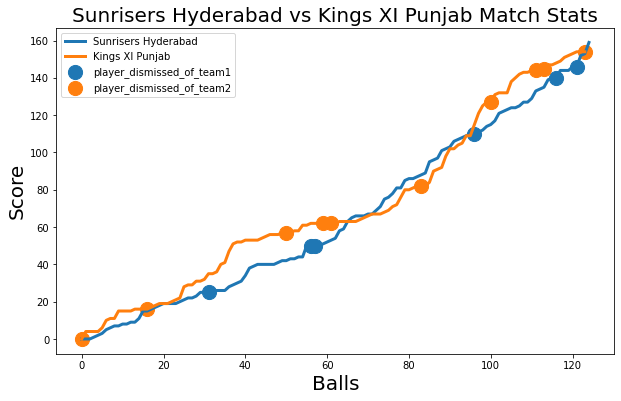

In [49]:
match_id=int(input("Please enter match_id: "))
match_stats(deliveries,match_id)